In [4]:
import numpy as np
import scipy.stats as sps

from scipy.stats import (
    norm, binom, expon, t, chi2, pareto, ttest_1samp, ttest_ind, sem
)
from statsmodels.stats.api import CompareMeans, DescrStatsW
from statsmodels.stats.proportion import proportion_confint
import numpy as numpy
from seaborn import distplot
from matplotlib import pyplot
import seaborn

import sys
sys.path.append('.')

import warnings
warnings.filterwarnings("ignore")

> Задача
>
> Привести пример распределения, из которого выборка размером 100 не удовлетворяет условиям t-test/t'-test. Критерии будут некорректно работать.

In [3]:
def sample_statistics(number_of_experiments, statistic_function, sample_size, sample_distr):
    """
        Функция для генерации выборки некой статистики statistic_function, построенной по выборке из распределения sample_distr.
        Возвращает выборку размера number_of_experiments для statistic_function.
    
        Праметры:
            - number_of_experiments: число экспериментов, в каждом из которых мы посчитаем statistic_function
            - statistic_function: статистика, которая принимает на вход выборку из распределения sample_distr
            - sample_size: размер выборки, которая подается на вход statistic_function
            - sample_distr: распределение изначальной выборки, по которой считается статистика
    """

    statistic_sample = []
    for _ in range(number_of_experiments):
        # генерируем number_of_experiments раз выборку
        sample = sample_distr.rvs(sample_size)

        # считаем статистику
        statistic = statistic_function(sample)

        #сохраняем
        statistic_sample.append(statistic)
    return statistic_sample

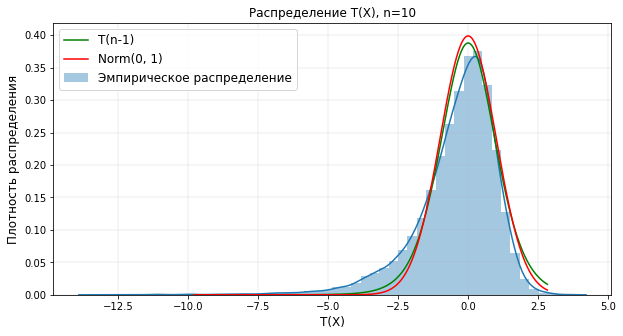

In [16]:
numpy.random.seed(42)

sample_size = 10
sample_distr = sps.expon(scale=100)

T_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / numpy.sqrt(numpy.var(sample, ddof=1)) # или numpy.std

T_sample = sample_statistics(
    number_of_experiments=10000, statistic_function=T_X,
    sample_size=sample_size, sample_distr=sample_distr
)


T_dist = t(df=sample_size-1) # Распределение T Стьюдента
Norm_dist = norm(loc=0, scale=1)

l_bound, r_bound = numpy.quantile(T_sample, [0.001, 0.999])
x = numpy.linspace(l_bound, r_bound, 1000)



pyplot.figure(figsize=(10, 5))
pyplot.title(f'Распределение T(X), n={sample_size}', fontsize=12)
distplot(T_sample, label='Эмпирическое распределение')
pyplot.plot(x, T_dist.pdf(x), c='green', label='T(n-1)')
pyplot.plot(x, Norm_dist.pdf(x), c='red', label='Norm(0, 1)')

pyplot.legend(fontsize=12)
pyplot.xlabel('T(X)', fontsize=12)
pyplot.ylabel('Плотность распределения', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

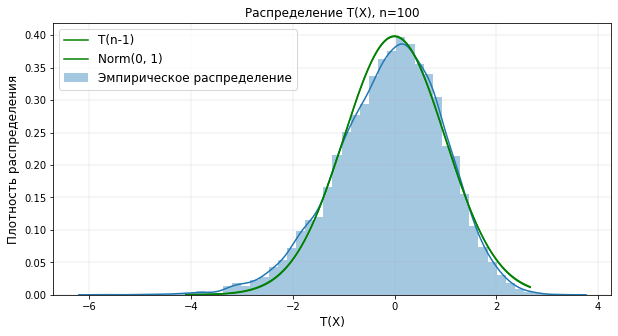

In [14]:
numpy.random.seed(42)

sample_size = 100
sample_distr = sps.expon(scale=100)

T_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / numpy.sqrt(numpy.var(sample, ddof=1)) # или numpy.std

T_sample = sample_statistics(
    number_of_experiments=10000, statistic_function=T_X,
    sample_size=sample_size, sample_distr=sample_distr
)


T_dist = t(df=sample_size-1) # Распределение T Стьюдента
Norm_dist = norm(loc=0, scale=1)

l_bound, r_bound = numpy.quantile(T_sample, [0.001, 0.999])
x = numpy.linspace(l_bound, r_bound, 1000)



pyplot.figure(figsize=(10, 5))
pyplot.title(f'Распределение T(X), n={sample_size}', fontsize=12)
distplot(T_sample, label='Эмпирическое распределение')
pyplot.plot(x, T_dist.pdf(x), c='green', label='T(n-1)')
pyplot.plot(x, Norm_dist.pdf(x), c='green', label='Norm(0, 1)')

pyplot.legend(fontsize=12)
pyplot.xlabel('T(X)', fontsize=12)
pyplot.ylabel('Плотность распределения', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()

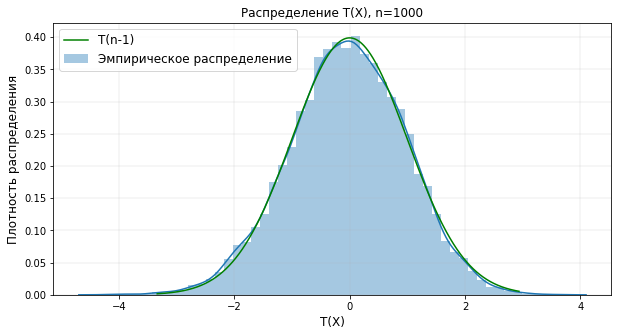

In [15]:
numpy.random.seed(42)

sample_size = 1000
sample_distr = sps.expon(scale=100)

T_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / numpy.sqrt(numpy.var(sample, ddof=1)) # или numpy.std

T_sample = sample_statistics(
    number_of_experiments=10000, statistic_function=T_X,
    sample_size=sample_size, sample_distr=sample_distr
)


T_dist = t(df=sample_size-1) # Распределение T Стьюдента

l_bound, r_bound = numpy.quantile(T_sample, [0.001, 0.999])
x = numpy.linspace(l_bound, r_bound, 1000)



pyplot.figure(figsize=(10, 5))
pyplot.title(f'Распределение T(X), n={sample_size}', fontsize=12)
distplot(T_sample, label='Эмпирическое распределение')
pyplot.plot(x, T_dist.pdf(x), c='green', label='T(n-1)')
pyplot.legend(fontsize=12)
pyplot.xlabel('T(X)', fontsize=12)
pyplot.ylabel('Плотность распределения', fontsize=12)
pyplot.grid(linewidth=0.2)
pyplot.show()